## <center> Evaluate Results </center>

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Load data
data_df = pd.read_csv('data/rating_auto_label_sentiment_two_classes.csv')
data_df = data_df [['review_text','sentiment']]
data_df = data_df.dropna()

result_LR = pd.read_csv('output/result_LR.csv')
result_SVM_LR = pd.read_csv('output/result_SVM_LR.csv')
result_SVM_RBF = pd.read_csv('output/result_SVM_RBF.csv')
result_DT = pd.read_csv('output/result_DT.csv')
result_EL = pd.read_csv('output/result_EL.csv')
# result_df = pd.read_csv('output/result_DB.csv')

result_df = pd.concat([result_LR, result_SVM_LR, result_SVM_RBF, result_DT, result_EL], axis=0)
result_df.reset_index(drop=True, inplace=True)
result_df.head(30)

,model,task_no,vectorizer,ngram,max_iter,C,gamma,tree_param,n_estimator,lrate,test_accuracy,wall_time,run_time
0,LogisticRegression,1,cbow,1,100000,NaN,NaN,NaN,0,0,0.744031,1.863177,2024-11-20 16:52:44
1,LogisticRegression,2,tfidf,1,100000,NaN,NaN,NaN,0,0,0.755492,0.133009,2024-11-20 16:52:46
2,LogisticRegression,3,cbow,2,100000,NaN,NaN,NaN,0,0,0.755492,6.903831,2024-11-20 16:52:59
3,LogisticRegression,4,tfidf,2,100000,NaN,NaN,NaN,0,0,0.774594,1.300022,2024-11-20 16:53:07
4,LogisticRegression,5,cbow,3,100000,NaN,NaN,NaN,0,0,0.764088,15.394228,2024-11-20 16:53:35
5,LogisticRegression,6,tfidf,3,100000,NaN,NaN,NaN,0,0,0.768863,4.076372,2024-11-20 16:53:51
6,LinearSVM,1,cbow,1,100000,NaN,NaN,NaN,0,0,0.714422,7.799611,2024-11-20 16:52:55
7,LinearSVM,2,tfidf,1,100000,NaN,NaN,NaN,0,0,0.734479,0.321826,2024-11-20 16:52:58
8,LinearSVM,3,cbow,2,100000,NaN,NaN,NaN,0,0,0.731614,35.546261,2024-11-20 16:53:39
9,LinearSVM,4,tfidf,2,100000,NaN,NaN,NaN,0,0,0.773639,0.616427,2024-11-20 16:53:46


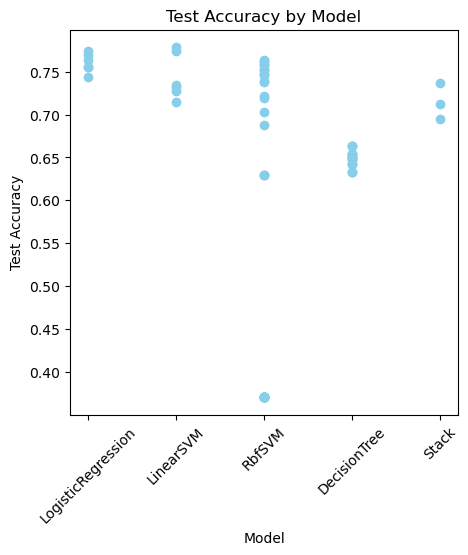

In [30]:
plt.figure(figsize=(5, 5))
plt.scatter(result_df['model'], result_df['test_accuracy'], color='skyblue')
plt.title('Test Accuracy by Model')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.xticks(rotation=45)
plt.show()